In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("C:\\Users\\Hira Coder\\Downloads\\credit_card_fraud_dataset.csv")
data

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [4]:
data.shape

(100000, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [6]:
data.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [7]:
data.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [8]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.nunique()

TransactionID      100000
TransactionDate    100000
Amount              90621
MerchantID           1000
TransactionType         2
Location               10
IsFraud                 2
dtype: int64

In [13]:
data.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')

In [14]:
data.dtypes

TransactionID        int64
TransactionDate     object
Amount             float64
MerchantID           int64
TransactionType     object
Location            object
IsFraud              int64
dtype: object

In [15]:
print("\nPercentage of missing values:\n", (data.isnull().mean() * 100).round(2))


Percentage of missing values:
 TransactionID      0.0
TransactionDate    0.0
Amount             0.0
MerchantID         0.0
TransactionType    0.0
Location           0.0
IsFraud            0.0
dtype: float64


In [16]:
le = LabelEncoder()
data['TransactionType'] = le.fit_transform(data['TransactionType'])
data['Location'] = le.fit_transform(data['Location'])


In [17]:
data['TransactionType'] 

0        1
1        1
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    0
99998    0
99999    1
Name: TransactionType, Length: 100000, dtype: int64

In [18]:
data['Location']

0        7
1        1
2        4
3        5
4        6
        ..
99995    7
99996    7
99997    7
99998    5
99999    2
Name: Location, Length: 100000, dtype: int64

In [19]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = data[(data['Amount'] < lower_limit) | (data['Amount'] > upper_limit)]
print(f"Total outliers detected: {len(outliers)}")
print(outliers[['TransactionID', 'Amount', 'Location', 'TransactionType']].head())

Total outliers detected: 0
Empty DataFrame
Columns: [TransactionID, Amount, Location, TransactionType]
Index: []


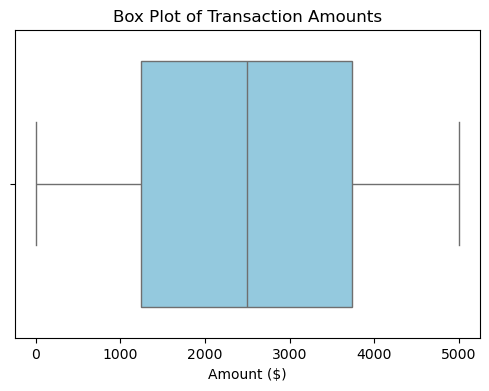

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Amount'], color='skyblue', fliersize=6)
plt.title("Box Plot of Transaction Amounts")
plt.xlabel("Amount ($)")
plt.show()

In [21]:
data = data.drop(columns=['TransactionID', 'TransactionDate'])


In [22]:
data

,Amount,MerchantID,TransactionType,Location,IsFraud
0,4189.27,688,1,7,0
1,2659.71,109,1,1,0
2,784.00,394,0,4,0
3,3514.40,944,0,5,0
4,369.07,475,0,6,0
...,...,...,...,...,...
99995,1057.29,289,1,7,0
99996,297.25,745,1,7,0
99997,3448.56,690,0,7,0
99998,3750.79,644,0,5,0


In [23]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']


In [24]:
X

,Amount,MerchantID,TransactionType,Location
0,4189.27,688,1,7
1,2659.71,109,1,1
2,784.00,394,0,4
3,3514.40,944,0,5
4,369.07,475,0,6
...,...,...,...,...
99995,1057.29,289,1,7
99996,297.25,745,1,7
99997,3448.56,690,0,7
99998,3750.79,644,0,5


In [25]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: IsFraud, Length: 100000, dtype: int64

In [39]:
smote = SMOTE(random_state=42)   # balance the imbalance data 
X_res, y_res = smote.fit_resample(X, y)

print("Before smote", y.value_counts().to_dict())
print("After smote", y_res.value_counts().to_dict()) 
# databset has 99000 non fraud and 1000 fraud before smote 
#after smote data set has Learn equally from both fraud and non-fraud examples
#Become much better at detecting fraud 

Before smote {0: 99000, 1: 1000}
After smote {0: 99000, 1: 99000}


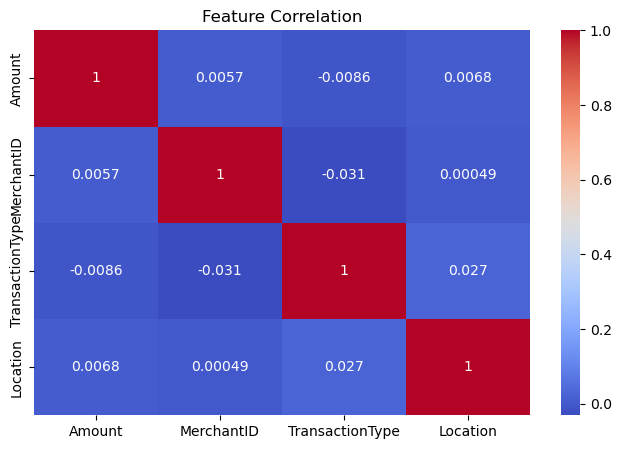

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(X_res.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train

array([[ 0.33138655, -1.11467979, -0.78418256,  1.42005811],
       [-1.11569936, -0.59382736,  1.27521325, -0.10500192],
       [-0.63021549, -1.33840164, -0.78418256, -1.24879695],
       ...,
       [-1.32202595,  1.59095633, -0.78418256, -1.63006196],
       [-1.69188398, -1.41181038, -0.78418256,  1.0387931 ],
       [ 0.19316604,  1.51405194, -0.78418256, -0.86753194]])

In [33]:
X_test

array([[ 0.84405906,  0.93027774, -0.78418256, -1.63006196],
       [ 1.38255612,  1.50356498, -0.78418256,  1.0387931 ],
       [-0.54516768, -0.00306185, -0.78418256,  0.27626308],
       ...,
       [-1.69349648, -1.15662764,  1.27521325,  0.27626308],
       [ 0.95125816, -0.92241883, -0.78418256,  0.27626308],
       [-0.51839303,  1.23789528, -0.78418256, -0.48626693]])

In [34]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [35]:
y_pred_log

array([1, 1, 1, ..., 0, 1, 1])

In [37]:
print("Logistic Regression Results")
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Results
ROC-AUC: 0.6210212415065728
F1-score: 0.6622236231818796
              precision    recall  f1-score   support

           0       0.66      0.50      0.57     19777
           1       0.60      0.74      0.66     19823

    accuracy                           0.62     39600
   macro avg       0.63      0.62      0.62     39600
weighted avg       0.63      0.62      0.62     39600



In [40]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results")
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

F:\Anacond\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:10:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
ROC-AUC: 0.8332094448724526
F1-score: 0.8433317513051732
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     19777
           1       0.80      0.90      0.84     19823

    accuracy                           0.83     39600
   macro avg       0.84      0.83      0.83     39600
weighted avg       0.84      0.83      0.83     39600



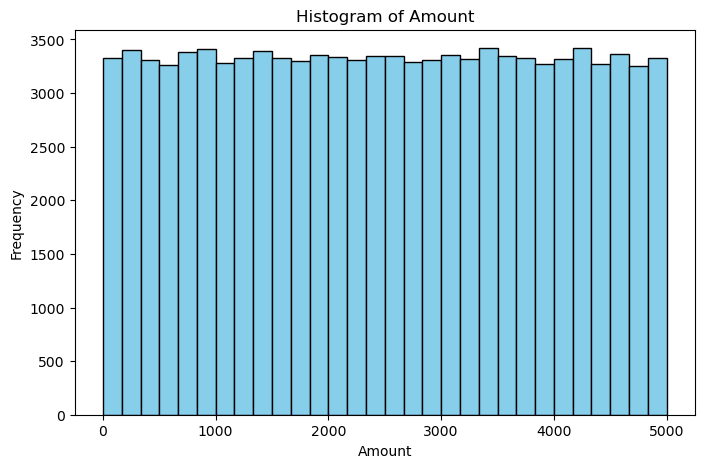

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(data['Amount'], bins=30, color="skyblue",edgecolor="black")
plt.title("Histogram of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
#plt.tight_layout()
plt.show()